In [ ]:
# Modelos
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import f1_score
from scipy.stats import spearmanr
from sklearn.model_selection import StratifiedKFold

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os 
df = pd.read_excel("/content/drive/My Drive/datos_features.xlsx")

Mounted at /content/drive


In [ ]:
#import os
#os.chdir("/content/drive/My Drive")
#!ls

In [ ]:
#drive.flush_and_unmount()

In [ ]:
#testDf = pd.read_excel("/content/drive/My Drive/testData.xlsx")

## Add labels to each quartile in train data

In [ ]:
humor = df[(df['is_humor'] == 1)]
#humor.shape
#humor = humor.sample(n=3000,random_state=1)

humor['label'] = 'humor'

lowOffense = humor.loc[(humor['offense_rating'] <= 0)]

highOffense = humor.loc[(humor['offense_rating'] > 1.45)]

lowOffense['tag'] = 0 #-1 #1 'low_offense'

highOffense['tag'] = 1 #4 #'high_offense'


#lowOffense = lowOffense.sample(n=740, random_state=1)
#highOffense = highOffense.sample(n=740, random_state=1)

t = pd.concat([lowOffense,highOffense])
t.shape

#highOffense.shape 1210 -> 45.8%
#lowOffense.shape 1253 -> 54.2%

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

(2463, 160)

In [ ]:
highOffense.shape

(1210, 160)

## Split into train and test

In [ ]:
ListaFeatures = [###content features
                 'Hurtlex-negative-stereotypes-ethnic-slurs','PsicoLIWChumans','PsicoLIWCsexual','PsicoLIWCswear',
                 'Hurtlex-moral-and-behavioral-defects','PsicoLIWCrelig','PsicoLIWCbio','PsicoLIWCsocial','PsicoLIWCsee',
                 'PsicoLIWCexcl','PsicoLIWCquant','PsicoLIWCleisure',
                 ###syntactic features
                 'PsicoLIWCi','PsicoLIWCppron','PsicoLIWCarticle','adjective_frequency','PsicoLIWCthey','PsicoLIWCpreps',
                 'PsicoLIWCauxverb','primera_plural_stanza','adverbs_frequency','noun_frequency',
                 #'PsicoLIWCshehe',
                 'segunda_singular_stanza',
                 ###affective features
                 'surprise_frequency_EmoSenticNet','fear_frequency_SentiSense','PsicoLIWCposemo','PsicoLIWCinhib','PsicoLIWCanx',
                 'PsicoLIWCaffect','disgust_frequency_SentiSense','PsicoLIWCanger','sadness_frequency_SentiSense',
                 'like_frequency_SentiSense','joy_frequency_SentiSense','love_frequency_SentiSense'
]

In [ ]:
X.iloc[:,[21,22,23,24,25,26,27,28,29,30,31,32,33,34]].describe()

,noun_frequency,PsicoLIWCthey,PsicoLIWCverb,surprise_frequency_EmoSenticNet,fear_frequency_SentiSense,dominance_anew_Normalized,like_frequency_SentiSense,subjectivity_score_textblob,PsicoLIWCanx,PsicoLIWCposemo,sadness_frequency_SentiSense,disgust_frequency_SentiSense,PsicoLIWCanger,PsicoLIWCinhib
count,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000
mean,0.243422,0.009822,0.147437,0.051604,0.011321,0.765014,0.025821,0.375273,0.003543,0.026885,0.004014,0.033858,0.010390,0.004700
std,0.093836,0.027259,0.066643,0.066669,0.028140,0.044435,0.038644,0.305347,0.015334,0.041365,0.016911,0.045692,0.026643,0.017716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.575589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.100000,0.000000,0.000000,0.737710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.235294,0.000000,0.142857,0.035714,0.000000,0.767944,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294118,0.000000,0.190476,0.076923,0.000000,0.794730,0.047619,0.600000,0.000000,0.047619,0.000000,0.058824,0.000000,0.000000
max,0.800000,0.222222,0.375000,0.375000,0.272727,0.943828,0.272727,1.000000,0.153846,0.300000,0.222222,0.285714,0.200000,0.230769


In [ ]:
y = t['tag']
X = t.loc[:,ListaFeatures]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, 
                                                    random_state = 0)

In [ ]:
X_test.shape

(493, 36)

### SVM

In [ ]:
### Grid search

clf_search_svm = GridSearchCV(estimator=svm.SVC(),
                              param_grid={'C': [1, 10, 100, 1000],
                                          'kernel': ('linear', 'rbf','poly','sigmoid'),
                                          'gamma': [0.001, 0.0001]
                                         })
m_svm = clf_search_svm.fit(X_train, y_train.values.ravel())
m_svm.best_estimator_

SVC(C=1000, gamma=0.001, kernel='linear')

In [ ]:
### Train the classifier

clf_svm = svm.SVC(C=1000, break_ties=False, 
                  cache_size=200, class_weight=None, 
                  coef0=0.0,decision_function_shape='ovr', 
                  degree=3, gamma=0.001, kernel='linear',
                  max_iter=-1, probability=False, 
                  random_state=None, shrinking=True,
                  tol=0.001, verbose=False
                  )

clf_svm.fit(X_train, y_train.values.ravel())

### Predict label with test data
y_pred_svm = clf_svm.predict(X_test)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

#scores_svm = 
print("Media de f1-score con cross_validation")
cross_val_score(clf_svm, X_train, y_train, cv=5, scoring='f1_macro').mean()

print("Media de f1-score con cross_validation en test: ")
cross_val_score(clf_svm, X_test, y_test, cv=5, scoring='f1_macro').mean()
#print("Media de f1-score con cross_validation en test: ", scores_svm.mean())

Accuracy del modelo: 0.742393509127789
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       239
           1       0.81      0.66      0.72       254

    accuracy                           0.74       493
   macro avg       0.75      0.75      0.74       493
weighted avg       0.75      0.74      0.74       493

Media de f1-score con cross_validation
Media de f1-score con cross_validation en test: 


0.721728071176245

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
recall, specificity

(0.65748031496063, 0.8326359832635983)

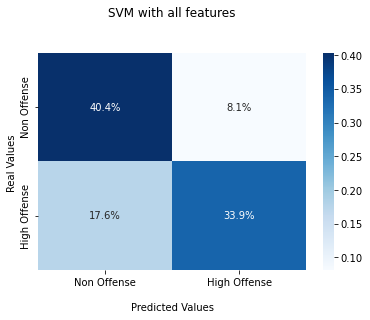

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('SVM with all features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Random forests

In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
param_grid = {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10,20]}
base_estimator = RandomForestClassifier(random_state=0)

sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                          factor=5, resource='n_estimators',
                          max_resources=30).fit(X_train, y_train.values.ravel())
sh.best_params_

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 30}

In [ ]:
### Train the classifier
clf_rf = RandomForestClassifier(max_depth=5, min_samples_split = 10, n_estimators = 30, random_state=0)
clf_rf.fit(X_train, y_train.values.ravel())

### Predict label with test data
y_pred_rf = clf_rf.predict(X_test)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", scores_rf.mean())

scores_rf = cross_val_score(clf_rf, X_test, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", scores_rf.mean())

Accuracy del modelo: 0.7606490872210954
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       239
           1       0.82      0.69      0.75       254

    accuracy                           0.76       493
   macro avg       0.77      0.76      0.76       493
weighted avg       0.77      0.76      0.76       493

Media de f1-score con cross_validation 0.7450133739855916
Media de f1-score con cross_validation en test:  0.7195850028287438


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
recall, specificity

(0.6850393700787402, 0.8410041841004184)

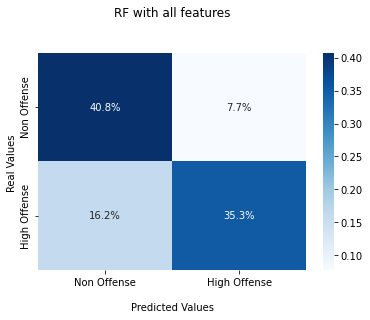

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('RF with all features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Logistic regression

In [ ]:
import numpy as np

grid_lr = GridSearchCV(estimator = LogisticRegression(max_iter=5000),
                      param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}, # l1 lasso l2 ridge
                      cv = 5 
                      )
grid_lr.fit(X_train,y_train.values.ravel())
grid_lr.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

{'C': 1000.0, 'penalty': 'l2'}

In [ ]:
# Train the classifier
clf_lr = LogisticRegression(C=1000,penalty="l2", max_iter=2000
                            )
clf_lr.fit(X_train,y_train.values.ravel())


### Predict label with test data
y_pred_lr = clf_lr.predict(X_test)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

scores_lr = cross_val_score(clf_lr, X_train, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", scores_lr.mean())

scores_lr = cross_val_score(clf_lr, X_test, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", scores_lr.mean())

Accuracy del modelo: 0.7302231237322515
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       239
           1       0.77      0.68      0.72       254

    accuracy                           0.73       493
   macro avg       0.73      0.73      0.73       493
weighted avg       0.73      0.73      0.73       493

Media de f1-score con cross_validation 0.7612537851260093
Media de f1-score con cross_validation en test:  0.7297874387806226


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
recall, specificity

(0.6811023622047244, 0.7824267782426778)

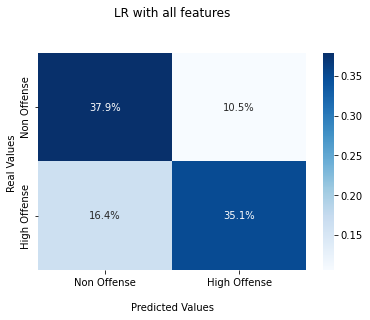

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('LR with all features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Ablation test

# With Content and Syntactic features

In [ ]:
X_train_ablation1 = X_train.loc[:,[### content features
                                   'Hurtlex-negative-stereotypes-ethnic-slurs','PsicoLIWChumans','PsicoLIWCsexual','PsicoLIWCswear',
                 'Hurtlex-moral-and-behavioral-defects','PsicoLIWCrelig','PsicoLIWCbio','PsicoLIWCsocial','PsicoLIWCsee',
                 'PsicoLIWCexcl','PsicoLIWCquant','PsicoLIWCleisure',
                 ###syntactic features
                 'PsicoLIWCi','PsicoLIWCppron','PsicoLIWCarticle','adjective_frequency','PsicoLIWCthey','PsicoLIWCpreps',
                 'PsicoLIWCauxverb','primera_plural_stanza','adverbs_frequency','noun_frequency',
                 #'PsicoLIWCshehe',
                 'segunda_singular_stanza',
                 ###affective features
                 #'surprise_frequency_EmoSenticNet','fear_frequency_SentiSense','PsicoLIWCposemo','PsicoLIWCinhib','PsicoLIWCanx',
                 #'PsicoLIWCaffect','disgust_frequency_SentiSense','anger_frequency_SentiSense','sadness_frequency_SentiSense',
                 #'like_frequency_SentiSense','joy_frequency_SentiSense','love_frequency_SentiSense'
]]

X_test_ablation1 = X_test.loc[:,[### content features
                                 'Hurtlex-negative-stereotypes-ethnic-slurs','PsicoLIWChumans','PsicoLIWCsexual','PsicoLIWCswear',
                 'Hurtlex-moral-and-behavioral-defects','PsicoLIWCrelig','PsicoLIWCbio','PsicoLIWCsocial','PsicoLIWCsee',
                 'PsicoLIWCexcl','PsicoLIWCquant','PsicoLIWCleisure',
                 ###syntactic features
                 'PsicoLIWCi','PsicoLIWCppron','PsicoLIWCarticle','adjective_frequency','PsicoLIWCthey','PsicoLIWCpreps',
                 'PsicoLIWCauxverb','primera_plural_stanza','adverbs_frequency','noun_frequency',
                 #'PsicoLIWCshehe',
                 'segunda_singular_stanza',
                 ###affective features
                # 'surprise_frequency_EmoSenticNet','fear_frequency_SentiSense','PsicoLIWCposemo','PsicoLIWCinhib','PsicoLIWCanx',
                # 'PsicoLIWCaffect','disgust_frequency_SentiSense','anger_frequency_SentiSense','sadness_frequency_SentiSense',
                # 'like_frequency_SentiSense','joy_frequency_SentiSense','love_frequency_SentiSense'
]]
X_test_ablation1.shape

(493, 23)

### SVM

In [ ]:
clf_svm = svm.SVC(C=1000, break_ties=False, 
                  cache_size=200, class_weight=None, 
                  coef0=0.0,decision_function_shape='ovr', 
                  degree=3, gamma=0.001, kernel='linear',
                  max_iter=-1, probability=False, 
                  random_state=None, shrinking=True,
                  tol=0.001, verbose=False
                  )

clf_svm.fit(X_train_ablation1, y_train.values.ravel())
### Predict label with test data
y_pred_svm = clf_svm.predict(X_test_ablation1)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

s1 = cross_val_score(clf_svm, X_train_ablation1, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", s1.mean())

score = cross_val_score(clf_svm, X_test_ablation1, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", score.mean())

Accuracy del modelo: 0.7363083164300203
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       239
           1       0.81      0.64      0.71       254

    accuracy                           0.74       493
   macro avg       0.75      0.74      0.73       493
weighted avg       0.75      0.74      0.73       493

Media de f1-score con cross_validation 0.7565820401116977
Media de f1-score con cross_validation en test:  0.7236932361386661


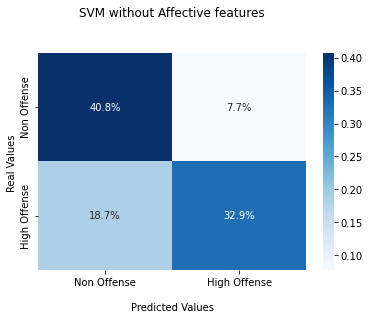

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('SVM without Affective features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.08, 0.19, 0.33, 0.41, 0.6377952755905512, 0.8410041841004184)

### Random forests

In [ ]:
### Train the classifier
clf_rf = RandomForestClassifier(max_depth=5, min_samples_split = 10, n_estimators = 30, random_state=0)
clf_rf.fit(X_train_ablation1, y_train.values.ravel())

### Predict label with test data
y_pred_rf = clf_rf.predict(X_test_ablation1)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

scores_rf = cross_val_score(clf_rf, X_train_ablation1, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", scores_rf.mean())

scores_rf = cross_val_score(clf_rf, X_test_ablation1, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", scores_rf.mean())

Accuracy del modelo: 0.7221095334685599
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       239
           1       0.78      0.64      0.70       254

    accuracy                           0.72       493
   macro avg       0.73      0.72      0.72       493
weighted avg       0.73      0.72      0.72       493

Media de f1-score con cross_validation 0.7413709536466595
Media de f1-score con cross_validation en test:  0.7298451652452332


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.09, 0.18, 0.33, 0.39, 0.6417322834645669, 0.8075313807531381)

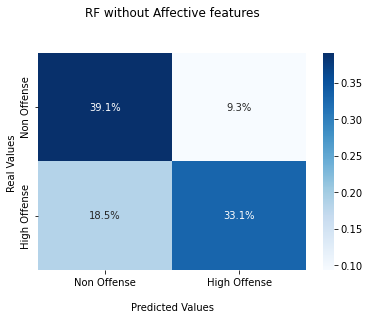

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('RF without Affective features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Logistic regression

In [ ]:
# Train the classifier
clf_lr = LogisticRegression(C=1000,penalty="l2",max_iter=2000)
clf_lr.fit(X_train_ablation1, y_train.values.ravel())

### Predict label with test data
y_pred_lr = clf_lr.predict(X_test_ablation1)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

scores_lr = cross_val_score(clf_lr, X_train_ablation1, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", scores_lr.mean())

scores_lr = cross_val_score(clf_lr, X_test_ablation1, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", scores_lr.mean())

Accuracy del modelo: 0.7484787018255578
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       239
           1       0.80      0.69      0.74       254

    accuracy                           0.75       493
   macro avg       0.75      0.75      0.75       493
weighted avg       0.75      0.75      0.75       493

Media de f1-score con cross_validation 0.7570098512889285
Media de f1-score con cross_validation en test:  0.7340643182981893


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.09, 0.16, 0.35, 0.4, 0.6850393700787402, 0.8158995815899581)

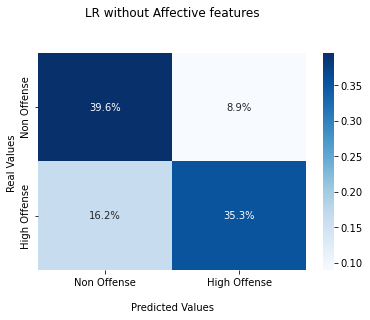

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('LR without Affective features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

# With Content and Affective features

In [ ]:
X_train_ablation2 = X_train.loc[:,[###content features
                                   'Hurtlex-negative-stereotypes-ethnic-slurs','PsicoLIWChumans','PsicoLIWCsexual','PsicoLIWCswear',
                 'Hurtlex-moral-and-behavioral-defects','PsicoLIWCrelig','PsicoLIWCbio','PsicoLIWCsocial','PsicoLIWCsee',
                 'PsicoLIWCexcl','PsicoLIWCquant','PsicoLIWCleisure',
                 ###syntactic features
                 #'PsicoLIWCi','PsicoLIWCppron','PsicoLIWCarticle','adjective_frequency','PsicoLIWCthey','PsicoLIWCpreps',
                 #'PsicoLIWCauxverb','primera_plural_stanza','adverbs_frequency','noun_frequency',
                 #'PsicoLIWCshehe','segunda_singular_stanza',
                 ###affective features
                 'surprise_frequency_EmoSenticNet','fear_frequency_SentiSense','PsicoLIWCposemo','PsicoLIWCinhib','PsicoLIWCanx',
                 'PsicoLIWCaffect','disgust_frequency_SentiSense','PsicoLIWCanger','sadness_frequency_SentiSense',
                 'like_frequency_SentiSense','joy_frequency_SentiSense','love_frequency_SentiSense'
]]

X_test_ablation2 = X_test.loc[:,[###content features
                                   'Hurtlex-negative-stereotypes-ethnic-slurs','PsicoLIWChumans','PsicoLIWCsexual','PsicoLIWCswear',
                 'Hurtlex-moral-and-behavioral-defects','PsicoLIWCrelig','PsicoLIWCbio','PsicoLIWCsocial','PsicoLIWCsee',
                 'PsicoLIWCexcl','PsicoLIWCquant','PsicoLIWCleisure',
                 ###syntactic features
                 #'PsicoLIWCi','PsicoLIWCppron','PsicoLIWCarticle','adjective_frequency','PsicoLIWCthey','PsicoLIWCpreps',
                 #'PsicoLIWCauxverb','primera_plural_stanza','adverbs_frequency','noun_frequency',
                 #'PsicoLIWCshehe','segunda_singular_stanza',
                 ###affective features
                 'surprise_frequency_EmoSenticNet','fear_frequency_SentiSense','PsicoLIWCposemo','PsicoLIWCinhib','PsicoLIWCanx',
                 'PsicoLIWCaffect','disgust_frequency_SentiSense','PsicoLIWCanger','sadness_frequency_SentiSense',
                 'like_frequency_SentiSense','joy_frequency_SentiSense','love_frequency_SentiSense'           

]]

### SVM

In [ ]:
clf_svm = svm.SVC(C=1000, break_ties=False, 
                  cache_size=200, class_weight=None, 
                  coef0=0.0,decision_function_shape='ovr', 
                  degree=3, gamma=0.001, kernel='linear',
                  max_iter=-1, probability=False, 
                  random_state=None, shrinking=True,
                  tol=0.001, verbose=False
                  )

clf_svm.fit(X_train_ablation2, y_train.values.ravel())
### Predict label with test data
y_pred_svm = clf_svm.predict(X_test_ablation2)
### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

Accuracy del modelo: 0.7261663286004056
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       239
           1       0.81      0.61      0.70       254

    accuracy                           0.73       493
   macro avg       0.74      0.73      0.72       493
weighted avg       0.74      0.73      0.72       493



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.07, 0.2, 0.31, 0.41, 0.610236220472441, 0.8493723849372385)

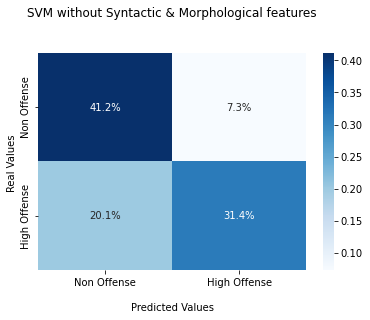

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('SVM without Syntactic & Morphological features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
s1 = cross_val_score(clf_svm, X_train_ablation2, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", s1.mean())

Media de f1-score con cross_validation 0.7496790533358307


In [ ]:
score = cross_val_score(clf_svm, X_test_ablation2, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", score.mean())

Media de f1-score con cross_validation en test:  0.7296191612503519


### Random forests

In [ ]:
### Train the classifier
clf_rf = RandomForestClassifier(max_depth=5, min_samples_split = 10, n_estimators = 30, random_state=0)
clf_rf.fit(X_train_ablation2, y_train.values.ravel())

### Predict label with test data
y_pred_rf = clf_rf.predict(X_test_ablation2)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

scores_rf = cross_val_score(clf_rf, X_train_ablation2, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", scores_rf.mean())

scores_rf = cross_val_score(clf_rf, X_test_ablation2, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", scores_rf.mean())

Accuracy del modelo: 0.7322515212981744
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       239
           1       0.81      0.63      0.71       254

    accuracy                           0.73       493
   macro avg       0.74      0.74      0.73       493
weighted avg       0.75      0.73      0.73       493

Media de f1-score con cross_validation 0.7544307596642247
Media de f1-score con cross_validation en test:  0.7233225971142703


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.08, 0.19, 0.33, 0.41, 0.6338582677165354, 0.8368200836820083)

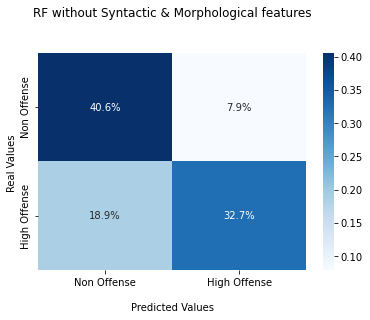

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('RF without Syntactic & Morphological features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Logistic regression

In [ ]:
# Train the classifier
clf_lr = LogisticRegression(C=100,penalty="l2",max_iter=200)
clf_lr.fit(X_train_ablation2 , y_train.values.ravel())

### Predict label with test data
y_pred_lr = clf_lr.predict(X_test_ablation2)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

scores_lr = cross_val_score(clf_lr, X_train_ablation2, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", scores_lr.mean())

scores_lr = cross_val_score(clf_lr, X_test_ablation2, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", scores_lr.mean())

Accuracy del modelo: 0.7200811359026369
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       239
           1       0.78      0.64      0.70       254

    accuracy                           0.72       493
   macro avg       0.73      0.72      0.72       493
weighted avg       0.73      0.72      0.72       493

Media de f1-score con cross_validation 0.7509117328844429
Media de f1-score con cross_validation en test:  0.7258562511373073


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.1, 0.18, 0.33, 0.39, 0.6417322834645669, 0.803347280334728)

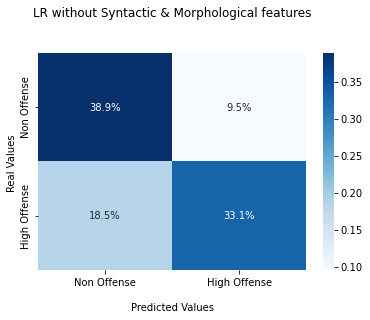

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('LR without Syntactic & Morphological features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

# With Syntactic and Affective features

In [ ]:
X_train_ablation3 = X_train.loc[:,[###content features
                # 'Hurtlex-negative-stereotypes-ethnic-slurs','PsicoLIWChumans','PsicoLIWCsexual','PsicoLIWCswear',
                # 'Hurtlex-moral-and-behavioral-defects','PsicoLIWCrelig','PsicoLIWCbio','PsicoLIWCsocial','PsicoLIWCsee',
                # 'PsicoLIWCexcl','PsicoLIWCquant','PsicoLIWCleisure',
                 ###syntactic features
                 'PsicoLIWCi','PsicoLIWCppron','PsicoLIWCarticle','adjective_frequency','PsicoLIWCthey','PsicoLIWCpreps',
                 'PsicoLIWCauxverb','primera_plural_stanza','adverbs_frequency','noun_frequency',
                 #'PsicoLIWCshehe',
                 'segunda_singular_stanza',
                 ###affective features
                 'surprise_frequency_EmoSenticNet','fear_frequency_SentiSense','PsicoLIWCposemo','PsicoLIWCinhib','PsicoLIWCanx',
                 'PsicoLIWCaffect','disgust_frequency_SentiSense','PsicoLIWCanger','sadness_frequency_SentiSense',
                 'like_frequency_SentiSense','joy_frequency_SentiSense','love_frequency_SentiSense'
]]

X_test_ablation3 = X_test.loc[:,[###content features
                # 'Hurtlex-negative-stereotypes-ethnic-slurs','PsicoLIWChumans','PsicoLIWCsexual','PsicoLIWCswear',
                # 'Hurtlex-moral-and-behavioral-defects','PsicoLIWCrelig','PsicoLIWCbio','PsicoLIWCsocial','PsicoLIWCsee',
                # 'PsicoLIWCexcl','PsicoLIWCquant','PsicoLIWCleisure',
                 ###syntactic features
                 'PsicoLIWCi','PsicoLIWCppron','PsicoLIWCarticle','adjective_frequency','PsicoLIWCthey','PsicoLIWCpreps',
                 'PsicoLIWCauxverb','primera_plural_stanza','adverbs_frequency','noun_frequency',
                 #'PsicoLIWCshehe',
                 'segunda_singular_stanza',
                 ###affective features
                 'surprise_frequency_EmoSenticNet','fear_frequency_SentiSense','PsicoLIWCposemo','PsicoLIWCinhib','PsicoLIWCanx',
                 'PsicoLIWCaffect','disgust_frequency_SentiSense','PsicoLIWCanger','sadness_frequency_SentiSense',
                 'like_frequency_SentiSense','joy_frequency_SentiSense','love_frequency_SentiSense'           

]]

X_train_ablation3.shape

(1970, 23)

### SVM

In [ ]:
clf_svm = svm.SVC(C=1000, break_ties=False, 
                  cache_size=200, class_weight=None, 
                  coef0=0.0,decision_function_shape='ovr', 
                  degree=3, gamma=0.001, kernel='linear',
                  max_iter=-1, probability=False, 
                  random_state=None, shrinking=True,
                  tol=0.001, verbose=False
                  )

clf_svm.fit(X_train_ablation3, y_train.values.ravel())
### Predict label with test data
y_pred_svm = clf_svm.predict(X_test_ablation3)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

s1 = cross_val_score(clf_svm, X_train_ablation3, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", s1.mean())

score = cross_val_score(clf_svm, X_test_ablation3, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", score.mean())

Accuracy del modelo: 0.6450304259634888
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       239
           1       0.66      0.63      0.65       254

    accuracy                           0.65       493
   macro avg       0.65      0.65      0.65       493
weighted avg       0.65      0.65      0.65       493

Media de f1-score con cross_validation 0.6700125544840141
Media de f1-score con cross_validation en test:  0.6200775315497891


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.17, 0.19, 0.33, 0.32, 0.6338582677165354, 0.6569037656903766)

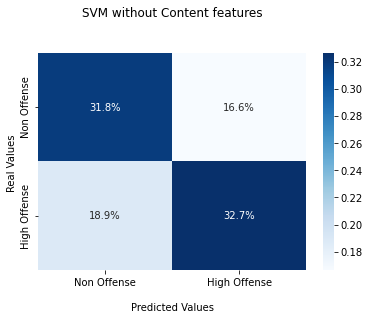

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('SVM without Content features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random forests

In [ ]:
### Train the classifier
clf_rf = RandomForestClassifier(max_depth=5, min_samples_split = 10, n_estimators = 30, random_state=0)
clf_rf.fit(X_train_ablation3, y_train.values.ravel())

### Predict label with test data
y_pred_rf = clf_rf.predict(X_test_ablation3)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

scores_rf = cross_val_score(clf_rf, X_train_ablation3, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", scores_rf.mean())

scores_rf = cross_val_score(clf_rf, X_test_ablation3, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", scores_rf.mean())

Accuracy del modelo: 0.6632860040567952
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       239
           1       0.68      0.65      0.67       254

    accuracy                           0.66       493
   macro avg       0.66      0.66      0.66       493
weighted avg       0.66      0.66      0.66       493

Media de f1-score con cross_validation 0.6543675261842314
Media de f1-score con cross_validation en test:  0.6313522985600064


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.16, 0.18, 0.34, 0.33, 0.6535433070866141, 0.6736401673640168)

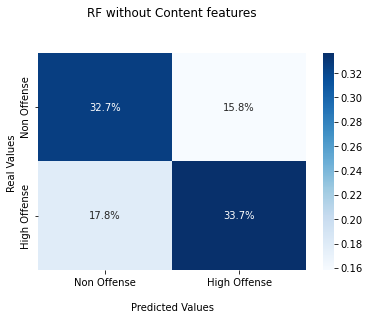

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('RF without Content features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Logistic regression

In [ ]:
# Train the classifier
clf_lr = LogisticRegression(C=100,penalty="l2",max_iter=200)
clf_lr.fit(X_train_ablation3, y_train.values.ravel())

### Predict label with test data
y_pred_lr = clf_lr.predict(X_test_ablation3)

### Model results
print("Accuracy del modelo:", accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

scores_lr = cross_val_score(clf_lr, X_train_ablation3, y_train, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation", scores_lr.mean())

scores_lr = cross_val_score(clf_lr, X_test_ablation3, y_test, cv=5, scoring='f1_macro')
print("Media de f1-score con cross_validation en test: ", scores_lr.mean())

Accuracy del modelo: 0.6572008113590264
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       239
           1       0.67      0.65      0.66       254

    accuracy                           0.66       493
   macro avg       0.66      0.66      0.66       493
weighted avg       0.66      0.66      0.66       493

Media de f1-score con cross_validation 0.6699424439042438
Media de f1-score con cross_validation en test:  0.6247920640602803


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
total = tn+fp+fn+tp
recall = tp/(tp+fn) 
specificity = tn/(tn+fp)
round(fp/total,2), round(fn/total,2), round(tp/total,2), round(tn/total,2), recall, specificity

(0.16, 0.18, 0.34, 0.32, 0.6535433070866141, 0.6610878661087866)

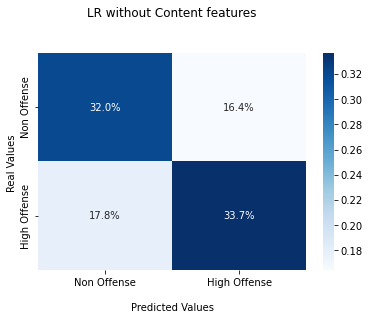

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

ax.set_title('LR without Content features\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Real Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non Offense','High Offense'])
ax.yaxis.set_ticklabels(['Non Offense','High Offense'])

## Display the visualization of the Confusion Matrix.
plt.show()